In [19]:
# Necessary imports
from data_preprocessing import make_stft_dataset
import h5py

# For plotting examples
import numpy as np
from matplotlib import pyplot as plt
fig_size = [0,0]
fig_size[0] = 8
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

### Processing raw data

In [ ]:
# Path to the data set (change this to point to a folder containing data to process)
data_directory = '.../LibriSpeech/dev-clean'

# Which level of subfolders to use as keys (for dev-clean sublevel 1 corresponds to speaker ids)
key_level = 1

# Which type of files to process
file_type = '.flac'

# file name of output file
output_file = '.../LibriSpeech/processed_dev-clean.h5'

# Make the data set
make_stft_dataset(data_directory,key_level,file_type,output_file)

### Reading in data from the output file

In [4]:
with h5py.File(output_file,'r') as test:
    data = []
    for key in test.keys():
        data += [i[:] for i in test[key].values()]

### Plot some of the data that was read in

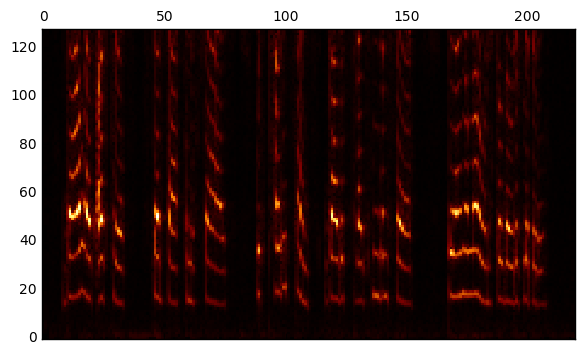

In [18]:
plt.matshow(np.sqrt(np.abs(data[-1][:,0:128])).T ,origin='lower',cmap='afmhot')
plt.show()